# Více grafů v jednom obrázku

Knihovna Matplotlib umožňuje vytvářet více grafů v jednom obrázku - buď přes sebe (to už známe), nebo vedle sebe. Při vytváření více grafů vedle sebe je důležité pamatovat na **stavovost** knihovny Matplotlib - knihovna si pamatuje, který graf je právě aktivní a všechny funkce budou ovlivňovat tento aktivní graf.

## Příprava dat

Pro ukázky použijeme meteorologická data:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Vytvoříme ukázková data (simulace meteorologických dat)
import numpy as np
np.random.seed(42)

dny = range(1, 366)
df = pd.DataFrame({
    'den': dny,
    'teplota': [10 + 15*np.sin(2*np.pi*d/365) + np.random.normal(0, 3) for d in dny],
    'vlhkost': [60 + 20*np.cos(2*np.pi*d/365) + np.random.normal(0, 5) for d in dny],
    'vitr': [3 + np.random.normal(0, 1) for d in dny],
    'oblacnost': [4 + 2*np.sin(2*np.pi*d/365) + np.random.normal(0, 1) for d in dny]
})

In [3]:
df.head()

,den,teplota,vlhkost,vitr,oblacnost
0,1,11.748343,77.990934,3.195845,3.953710
1,2,10.101531,81.108610,2.021627,4.147478
2,3,12.717361,80.036298,3.408253,2.105039
3,4,15.601126,80.440987,1.297416,5.053933
4,5,10.587012,76.060915,4.029156,4.518418


---
## Metoda `plt.subplot`

Metoda `plt.subplot` vytvoří graf na zvolené pozici a nastaví ho jako aktivní. Pracuje na základě dvourozměrné mřížky grafů.

Metoda přijímá 3 parametry:
- `nrows` - počet řádků v mřížce grafů
- `ncols` - počet sloupců v mřížce grafů
- `index` - číslo grafu, který má být aktivní (čísluje se od 1)

### Příklad: Mřížka 2x2 (4 grafy)

In [ ]:
plt.figure(figsize=(12, 8))

# Nastavíme první graf jako aktivní
plt.plot(df['teplota'])
plt.title('Denní teplota')

# Nastavíme druhý graf jako aktivní
plt.plot(df['vlhkost'])
plt.title('Denní vlhkost')

# Nastavíme třetí graf jako aktivní
plt.plot(df['vitr'])
plt.title('Rychlost větru')

# Nastavíme čtvrtý graf jako aktivní
plt.plot(df['oblacnost'])
plt.title('Oblačnost')

plt.show()

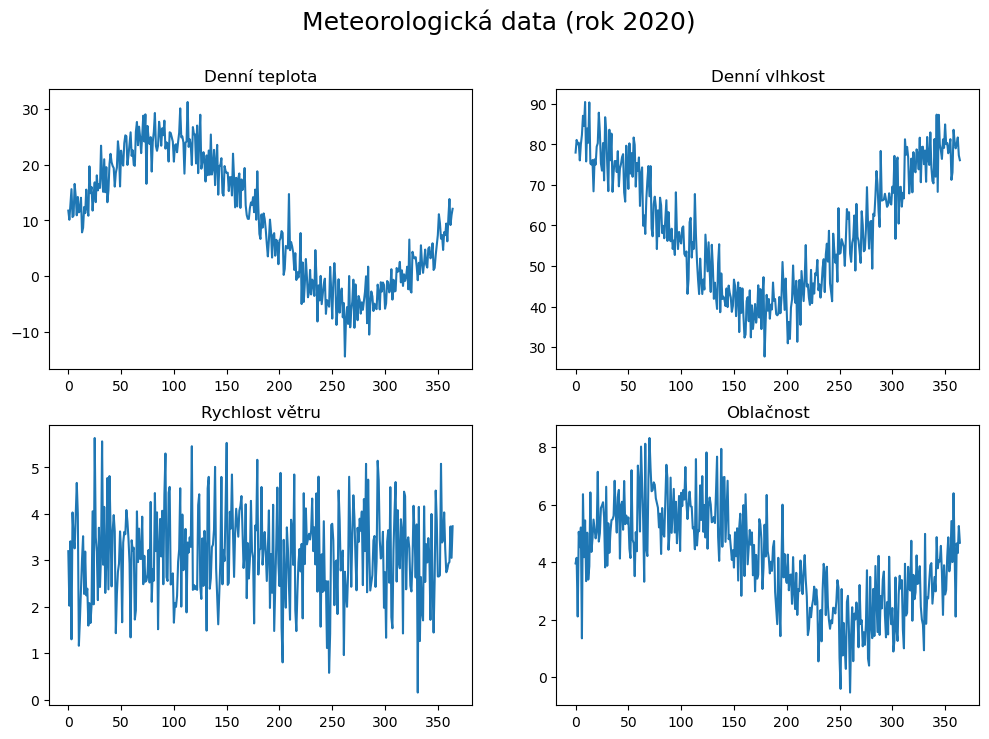

### Způsoby předávání parametrů

Parametry lze předat třemi způsoby:

In [13]:
# Způsob 1: Tři samostatné parametry (doporučený způsob)
print("plt.subplot(2, 2, 1)")

# Způsob 2: Trojciferné číslo
print("plt.subplot(221)")

# Způsob 3: Seznam
print("plt.subplot([2, 2, 1])")

plt.subplot(2, 2, 1)
plt.subplot(221)
plt.subplot([2, 2, 1])


---
## Metoda `plt.suptitle`

Metoda vytvoří nadpis umístěný nad všechny grafy.

Parametry:
- `text` - zobrazovaný řetězec
- `fontsize` - velikost textu

In [ ]:
# skopíruj předchozí graf

# doplň nadpis nad

plt.show()

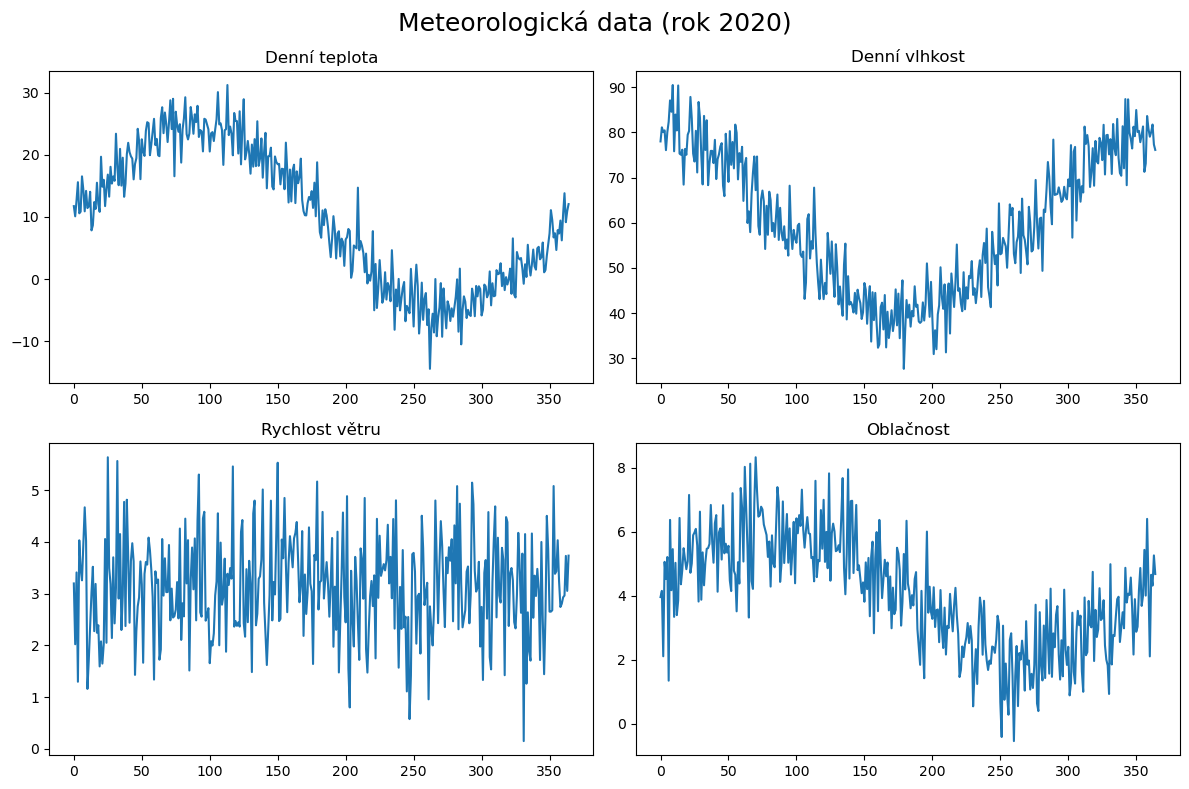

---
## Sdílení os (`sharex`, `sharey`)

Někdy chceme, aby dva grafy sdílely hodnoty na jedné z os (měly stejné měřítko a značky). V takovém případě:

1. Uložíme první vytvořený graf do proměnné
2. Předáme ho parametru `sharey` nebo `sharex` při vytváření druhého grafu

In [ ]:
plt.figure(figsize=(12, 8))

# doplň
plt.plot(df['teplota'], label='Denní teplota')
plt.title("Denní teplota")

# doplň
plt.plot(df['vlhkost'], label='Denní vlhkost')
plt.title("Denní vlhkost")

plt.tight_layout()
plt.show()

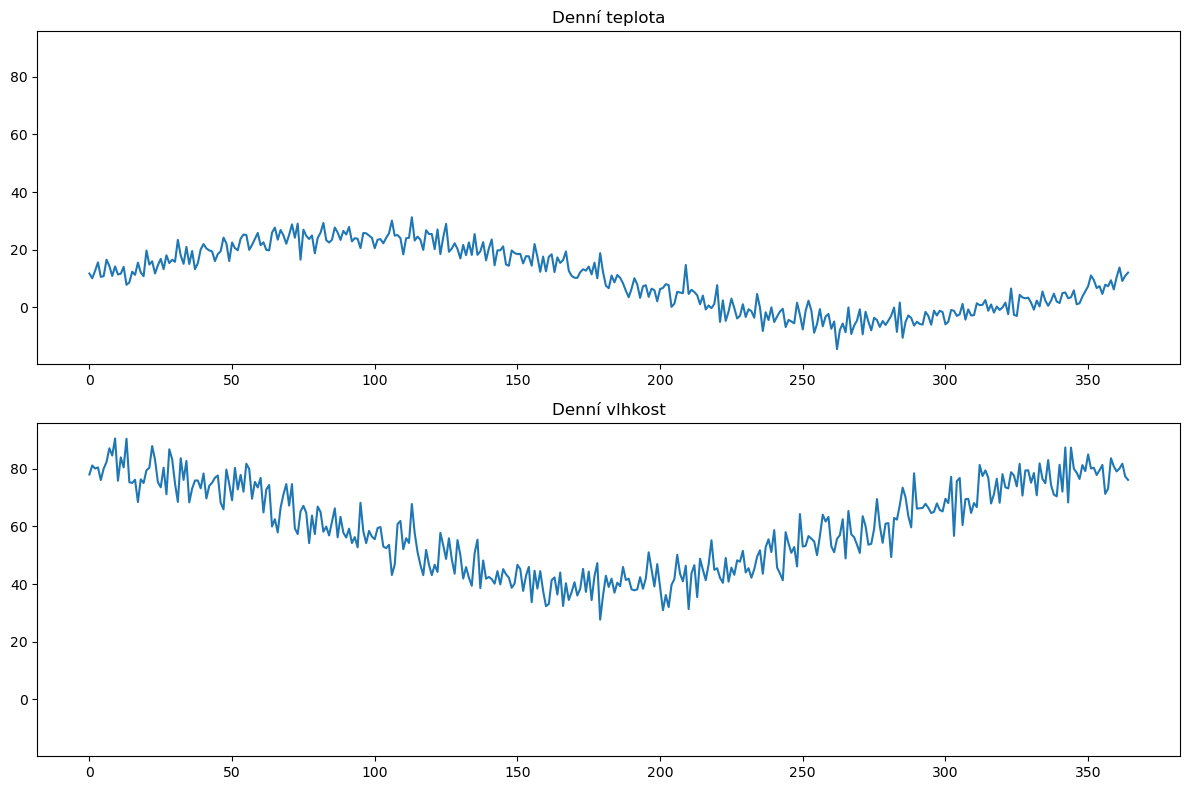

Poznámka: Výše uvedený příklad se sdílenou osou Y nedává příliš smysl (hodnoty na obou osách jsou v různých jednotkách) - je připraven pouze jako ukázka možnosti vytvoření grafů se společnou osou.

---
## Metoda `plt.subplot2grid`

Metoda funguje podobně jako `plt.subplot`, ale umožňuje vytvářet grafy s různou šířkou nebo výškou.

Parametry:
- `shape` - dvojprvkový seznam s informací o šířce a výšce mřížky grafů
- `loc` - dvojprvkový seznam s informací o umístění grafu (indexuje se od 0!)
- `rowspan` - kolik řádků má graf zabírat
- `colspan` - kolik sloupců má graf zabírat

In [ ]:
plt.figure(figsize=(12, 8))

# doplň
plt.plot(df['teplota'])
plt.title("Denní teplota")

# doplň
plt.plot(df['vlhkost'], label='Denní vlhkost')
plt.title("Denní vlhkost")

# doplň
plt.plot(df['vitr'], label='Rychlost větru')
plt.title("Rychlost větru")

plt.show()

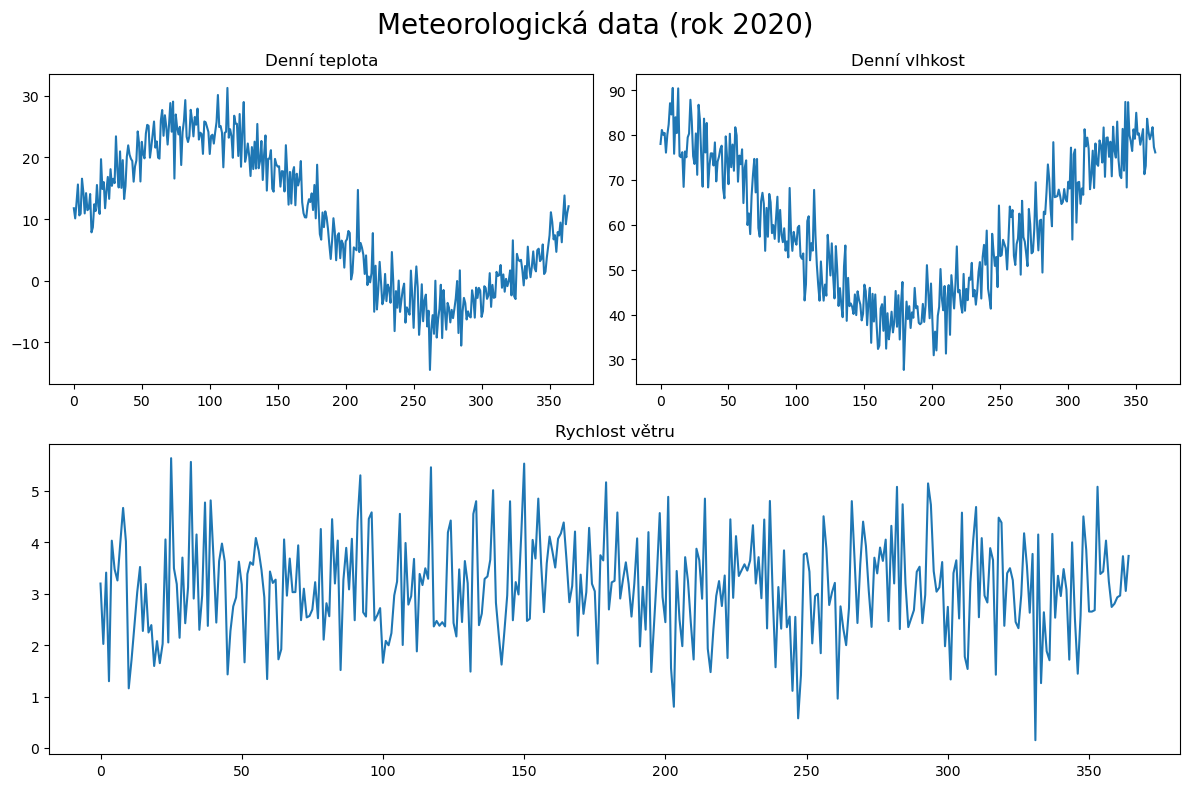

### Příklad: Složitější rozložení grafů

In [ ]:
def write_info(x, y, colspan, rowspan):
    """Pomocná funkce pro zobrazení informací o pozici grafu."""
    plt.text(0.5, 0.5, f"Subplot ({x}, {y}), rowspan = {rowspan}, colspan = {colspan}", 
             va="center", ha="center", fontsize=10)
    plt.tick_params(labelbottom=False, labelleft=False)

plt.figure(figsize=(15, 10))

plt.subplot2grid((3, 3), (0, 0), colspan=3)
write_info(0, 0, 3, 1)

plt.subplot2grid((3, 3), (1, 0), colspan=2)
write_info(1, 0, 2, 1)

plt.subplot2grid((3, 3), (1, 2), rowspan=2)
write_info(1, 2, 1, 2)

plt.subplot2grid((3, 3), (2, 0))
write_info(2, 0, 1, 1)

plt.subplot2grid((3, 3), (2, 1))
write_info(2, 1, 1, 1)

plt.tight_layout()
plt.show()

---
## Otázky k zamyšlení

**Otázka 1:** Jaký je rozdíl mezi `plt.subplot(2, 2, 1)` a `plt.subplot2grid((2, 2), (0, 0))`?

**Otázka 2:** K čemu slouží parametry `colspan` a `rowspan` v metodě `plt.subplot2grid`?

**Otázka 3:** Jaký je rozdíl mezi `plt.title()` a `plt.suptitle()`?

---
## Úlohy na opravu chyb

### Úloha 1: Opravte chybu v kódu

V následujícím kódu je chyba. Najděte ji a opravte.

In [ ]:
# CHYBNÝ KÓD - opravte ho
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 0)
plt.plot([1, 2, 3], [1, 2, 3])
plt.title('Graf 1')

plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [3, 2, 1])
plt.title('Graf 2')

plt.show()

### Úloha 2: Opravte chybu v kódu

V následujícím kódu je chyba v indexování. Opravte ji.

In [ ]:
# CHYBNÝ KÓD - opravte ho
plt.figure(figsize=(10, 6))

plt.subplot2grid((2, 2), (1, 1)) 
plt.plot([1, 2, 3], [1, 4, 2])
plt.title('První graf')

plt.subplot2grid((2, 2), (0, 1))
plt.plot([1, 2, 3], [2, 1, 3])
plt.title('Druhý graf')

plt.tight_layout()
plt.show()

---
## Úlohy k procvičení

### Úloha 3: Dva grafy vedle sebe

Vytvořte obrázek se dvěma grafy vedle sebe (horizontálně):
- První graf: liniový graf teploty
- Druhý graf: liniový graf vlhkosti

Přidejte nadpisy k jednotlivým grafům a společný nadpis nad oba grafy.

In [ ]:
# Zde napište svůj kód


### Úloha 4: Mřížka 2x2 s legendou

Vytvořte mřížku 2x2 grafů se všemi čtyřmi meteorologickými veličinami. Ke každému grafu přidejte legendu pomocí `plt.legend()`.

In [ ]:
# Zde napište svůj kód


### Úloha 5: Graf přes dva sloupce

Pomocí `plt.subplot2grid` vytvořte rozložení:
- Nahoře: dva menší grafy vedle sebe
- Dole: jeden velký graf přes celou šířku (colspan=2)

In [ ]:
# Zde napište svůj kód


### Úloha 6: Sdílená osa X

Vytvořte dva grafy pod sebou, které sdílejí osu X (použijte parametr `sharex`).

In [ ]:
# Zde napište svůj kód


---
## Praktická úloha: Přirozený a migrační pohyb

V souboru **Population in Poland - projections.xlsx** najdete list **natural and migratory movement**.

V rámci jednoho obrázku vytvořte dva grafy **těsně vedle sebe (horizontálně)**:
- narození a úmrtí (dvě čáry na základě sloupců **Natural increase - Births** a **Natural decrease - Deaths**)
- emigrace a imigrace (dvě čáry na základě sloupců **Foreign permanent migration - Immigration** a **Foreign permanent migration - Emigration**)

Ke každému grafu přidejte legendu vysvětlující význam jednotlivých čar.

In [ ]:
# Zde napište svůj kód
# Nápověda:
# 1. Načtěte data pomocí pd.read_excel()
# 2. Použijte plt.subplot(1, 2, 1) a plt.subplot(1, 2, 2)
# 3. Pro každý subplot vykreslete dvě čáry pomocí plt.plot()
# 4. Přidejte legendy pomocí plt.legend()


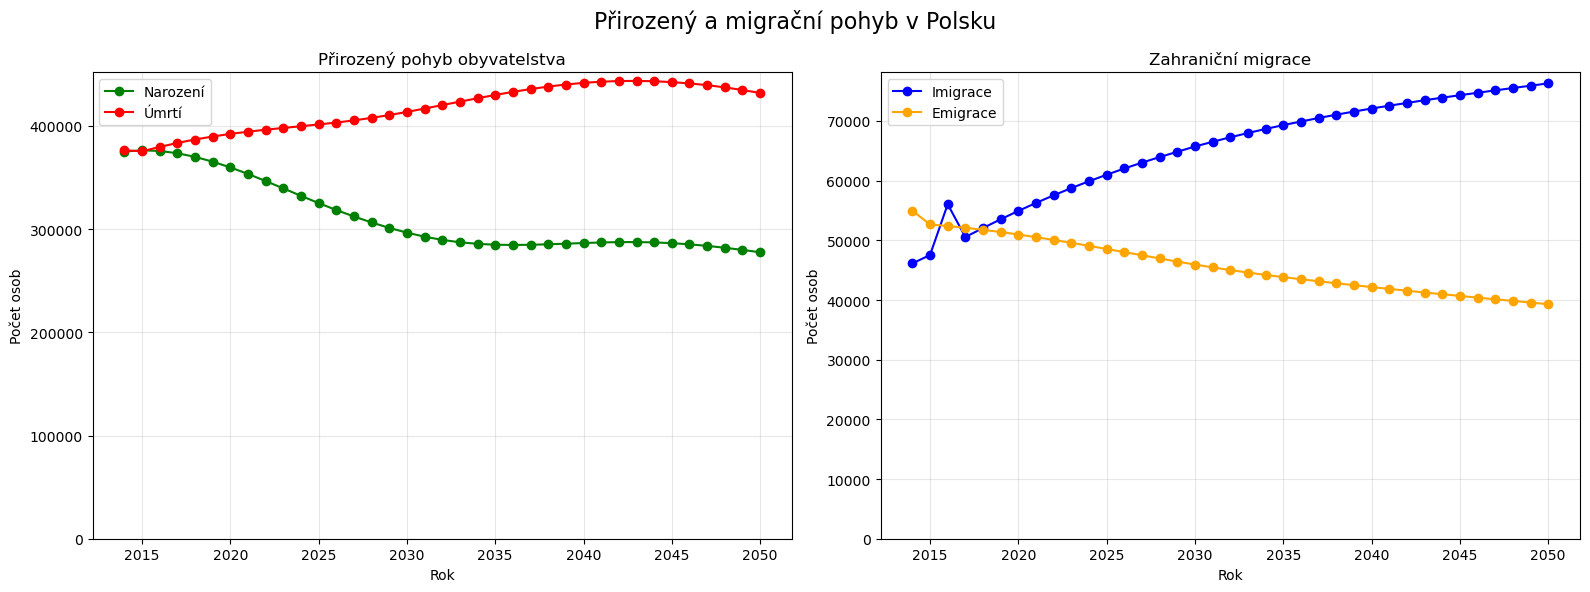

---
## Přehled použitých metod a funkcí

| Metoda/Funkce | Popis |
|---------------|-------|
| `plt.figure(figsize=(w, h))` | Vytvoří nový obrázek se zadanou velikostí |
| `plt.subplot(nrows, ncols, index)` | Vytvoří subplot v mřížce a nastaví ho jako aktivní (indexuje od 1) |
| `plt.subplot2grid(shape, loc, colspan, rowspan)` | Vytvoří subplot s možností rozprostření přes více buněk (indexuje od 0) |
| `plt.suptitle(text, fontsize)` | Vytvoří hlavní nadpis nad všechny grafy |
| `plt.title(text)` | Vytvoří nadpis pro aktuální graf |
| `plt.plot(data, label)` | Vykreslí liniový graf |
| `plt.legend()` | Zobrazí legendu na základě parametrů label |
| `plt.tight_layout()` | Automaticky upraví rozestupy mezi grafy |
| `plt.show()` | Zobrazí výsledný obrázek |
| `sharex=ax` / `sharey=ax` | Parametry pro sdílení os mezi grafy |